# Пример понижения размерности с помощью PCA

In [1]:
import numpy as np

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))

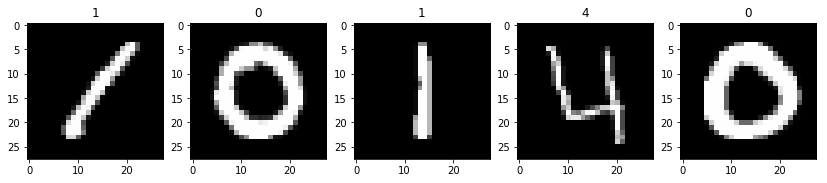

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % int(train_label[i - 1]));

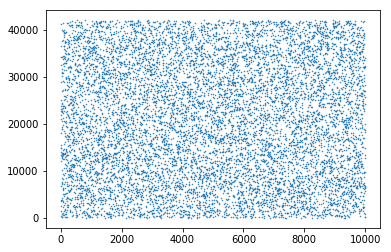

In [25]:
plt.plot(np.random.choice(train_img.shape[0], 10000), '.', markersize=1)

In [5]:
# выбираем семпл данных для обработки
choices = np.random.choice(train_img.shape[0], 10000)

y = train_label[choices]
X = train_img[choices].reshape(-1, 28 * 28).astype(np.float32)

In [6]:
# центрируем данные
X_mean = X.mean(axis=0)
X -= X_mean

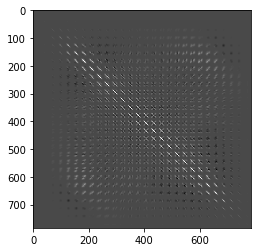

In [7]:
# матрица ковариации признаков
cov = np.dot(X.T, X) / X.shape[0]
plt.imshow(cov, cmap = 'gray')

In [8]:
U, S, _ = np.linalg.svd(cov)
# U - собсвенные вектора матрицы ковариации
# S - собственные значения

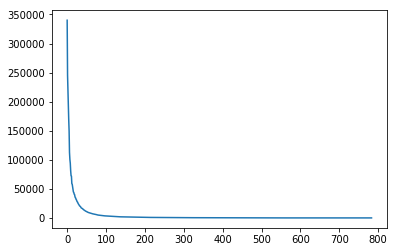

In [9]:
plt.plot(S)

## Собственные числа

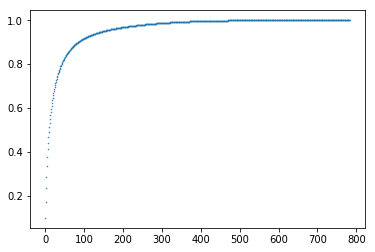

In [10]:
# накопленная сумма собственных значений
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, '.', markersize=1)

In [11]:
for i in range(5):
    print('[%03d] %.3f' % (i, S_cumsum[i]))

[000] 0.099
[001] 0.170
[002] 0.233
[003] 0.286
[004] 0.335


## Понижаем размерность

In [12]:
S_thr = 0.75  # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=32 S=0.753


In [13]:
# получаем сжатое представление объектов
Xrot_reduced = np.dot(X, U[:, :n_comp])

## Восстанавливаем изображение после понижения размерности

In [14]:
Xrot_restored = np.dot(Xrot_reduced, U[:,:n_comp].T)

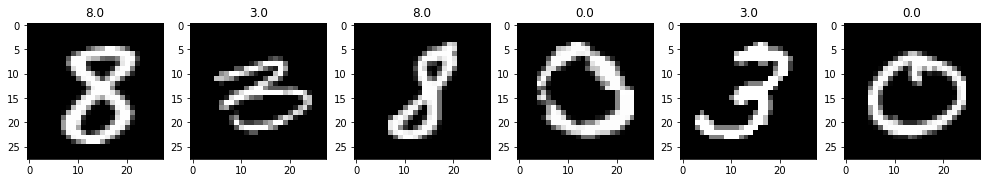

In [15]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img + X_mean
    plt.title('%s' % y[i-1])
    plt.imshow(img_.reshape((28,28)), cmap='gray');

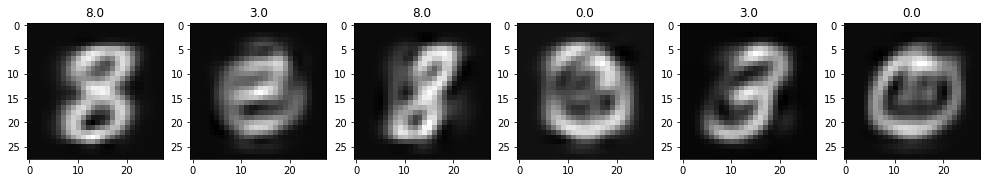

In [16]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(Xrot_restored[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img + X_mean
    plt.title('%s' % y[i-1])
    plt.imshow(img_.reshape((28,28)) + X_mean.reshape((28,28)), cmap='gray');

## Визуализация собственных векторов

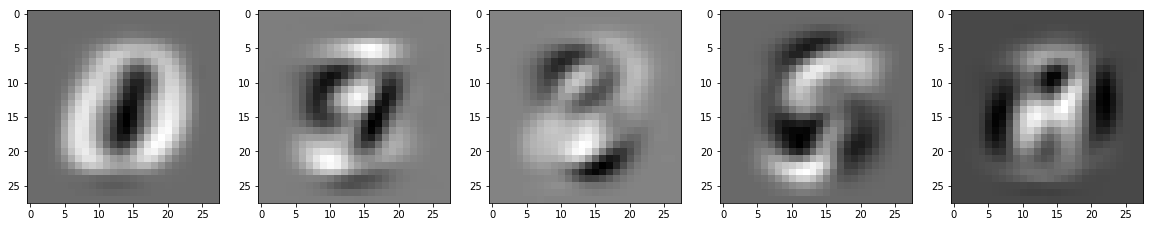

In [17]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(U.T[:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img.reshape((28,28)), cmap='gray');